<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/Tinoco_ex10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tinoco Example 10.2
The hydrolysis of carbobenzoxyglycyl-l-tryptophan catalyzed
by pancreatic carboxypeptidase occurs according to the reaction
Carbobenzoxyglycyl-l-tryptophan + H~2~O -> carbobenzoxyglycine + l-tryptophan
The following data on the rate of formation of l-tryptophan at 25°C, pH 7.5, were
obtained by R. Lumry, E. L. Smith, and R. R. Glantz, 1951, J. Am. Chem. Soc. 73:4330

In [2]:
# Tinoco Example 10.2
import numpy as np
import matplotlib.pyplot as plt
c_s = 2.5,5.0,10.0,15.0,20.0 # mM substrate
c_s = np.array(c_s)
v0 = 0.024, 0.036, 0.053, 0.060, 0.064 # rate, mM/s
v0 = np.array(v0)

## First, Lineweaver-Burke analysis

Vmax: 0.085 ± 0.038
Km: 6.39 ± 0.03


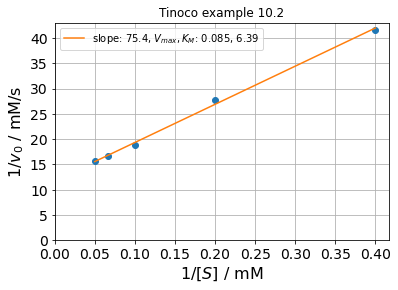

In [3]:
# L-B plot 1/v0 = Km/Vmax x 1/S + 1/Vmax
# Tinoco Example 10.2
x = 1/c_s; y = 1/v0
plt.plot(x,y,'o')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches(6, 4)
plt.xlabel('$1/[S]$ / mM',fontsize=16)
plt.ylabel('$1/v_0$ / mM/s',fontsize=16)
plt.xlim(0,); plt.ylim(0,)
plt.title('Tinoco example 10.2')
# fit to a straight line: 1/v0 = Km/Vmax x 1/S + 1/Vmax
# slope is Km/Vmax; intercept is 1/Vmax
popt,pcov = np.polyfit(x,y,1, cov=True)
Vmax = 1/popt[1]; Vmax_err = pcov[1,1]**0.5*Vmax
Km = popt[0]/popt[1]; Km_err = pcov[0,0]**0.5/popt[0]
plt.plot(x,x*Km/Vmax+1/Vmax, 
         label='slope: %.3g, $V_{max}, K_M$: %.2g, %.3g' % (popt[0], Vmax, Km))
print(F'Vmax: {Vmax:.2g} ± {Vmax_err:.2g}')
print(F'Km: {Km:.2f} ± {Km_err:.2f}')
plt.legend()
plt.show()

## Next, an Eadie-Hofstee plot

Vmax: 0.086 ± 0.0025
Km: 6.52 ± 0.40


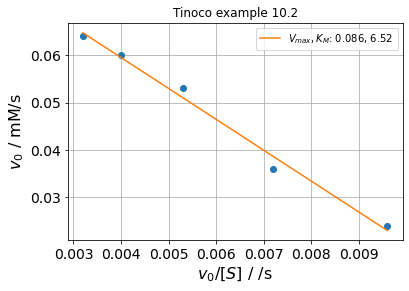

In [4]:
# Eadie-Hofstee plot v0 = -Km*v0/[S] + Vmax 
x = v0/c_s; y = v0
plt.plot(x,y,'o')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches(6, 4)
plt.xlabel('$v_0/[S]$ / /s',fontsize=16)
plt.ylabel('$v_0$ / mM/s',fontsize=16)
plt.title('Tinoco example 10.2')
# fit
# fit to a straight line: v0 = -Km*v0/[S] + Vmax 
# slope is 1/Vmax; intercept is Km/Vmax
popt,pcov = np.polyfit(x,y,1, cov=True)
Vmax = popt[1]; Vmax_err = pcov[1,1]**0.5
Km = -popt[0]; Km_err = pcov[0,0]**0.5
calc_y = -Km*x+Vmax
plt.plot(x,calc_y, label='$V_{max}, K_M$: %.2g, %.3g' % (Vmax, Km))
print(F'Vmax: {Vmax:.2g} ± {Vmax_err:.2g}')
print(F'Km: {Km:.2f} ± {Km_err:.2f}')
plt.legend()
plt.show()

## Lastly, direct non-linear fitting of the Michaelis-Menten Equation:

Vmax: 0.086 ± 0.0024
Km: 6.56 ± 0.48


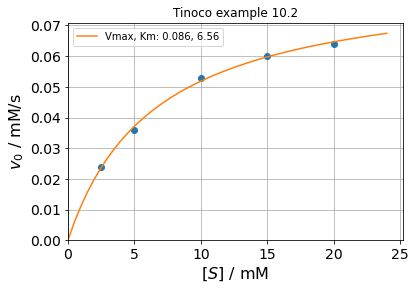

In [5]:
# Tinoco 10.2 -- Michaelis-Menten NLLS fitting
x = c_s; y = v0
plt.plot(x,y,'o')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches(6, 4)
plt.xlabel('$[S]$ / mM',fontsize=16)
plt.ylabel('$v_0$ / mM/s',fontsize=16)
plt.title('Tinoco example 10.2')
# fit
from scipy.optimize import curve_fit
def MM_fit(S,Vmax,Km):
  return Vmax*S/(S+Km)
f = MM_fit
popt,pcov = curve_fit(f,x,y)
Vmax = popt[0]; Vmax_err = pcov[0,0]**0.5
Km = popt[1]; Km_err = pcov[1,1]**0.5
xcalc = np.linspace(0,max(x)*1.2) # x points for fitted line
ycalc = f(xcalc,*popt)
plt.plot(xcalc,ycalc, label='Vmax, Km: %.2g, %.3g' % (popt[0], popt[1]))
plt.xlim(0,); plt.ylim(0,)
print(F'Vmax: {Vmax:.2g} ± {Vmax_err:.2g}')
print(F'Km: {Km:.3g} ± {Km_err:.2g}')
plt.legend()
plt.show()